In [1]:
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# open mega data 
surface = xr.open_mfdataset("/Users/julianschmitt/Downloads/era5/monthly/global_surface_20yr.nc")
pressure = xr.open_mfdataset("/Users/julianschmitt/Downloads/era5/monthly/global_pressure_20yr_pt1.nc")
geo = xr.open_dataset("coszen_data.nc")


In [120]:
# select to tropical pacific region
pressure = pressure.where((pressure.latitude > -45) & (pressure.latitude < 45) & (pressure.longitude > 180) & (pressure.longitude < 290), drop =True)
surface = surface.where((surface.latitude > -45) & (surface.latitude < 45) & (surface.longitude > 180) & (surface.longitude < 290), drop =True)
# monthly time mean
pressure["date"] = pd.to_datetime(pressure["date"].astype(str), format="%Y%m%d")
surface["date"] = pd.to_datetime(surface["date"].astype(str), format="%Y%m%d")
pressure_avg = pressure.groupby("date.month").mean()
surface_avg = surface.groupby("date.month").mean()


In [121]:
# execute stored netcdf computations 
surface_avg = surface_avg.load()

In [122]:
pressure_avg = pressure_avg.load()

In [17]:
nh_column_data = xr.open_dataset("~/Downloads/era5/monthly/NH_monthly_PL.nc")
nh_surface_data = xr.open_dataset("~/Downloads/era5/monthly/NH_monthly_surface.nc")


# southern hemisphere era5 data
sh_column_data = xr.open_dataset("~/Downloads/era5/monthly/SH_monthly_PL.nc")
sh_surface_data = xr.open_dataset("~/Downloads/era5/monthly/SH_monthly_surface.nc")



# col = xr.open_dataset("~/Downloads/column.nc")
geo = xr.open_dataset("coszen_data.nc")
geo

<xarray.Dataset> Size: 7kB
Dimensions:  (site: 119, date: 4)
Coordinates:
  * site     (site) int64 952B 1 2 3 4 5 6 7 8 ... 113 114 115 116 117 118 119
  * date     (date) int64 32B 20080101 20080401 20080701 20081001
Data variables:
    lat      (site) float64 952B ...
    lon      (site) float64 952B ...
    coszen   (date, site) float64 4kB ...

In [32]:
nh_column_data

<xarray.Dataset> Size: 68MB
Dimensions:         (date: 4, pressure_level: 37, latitude: 93, longitude: 113)
Coordinates:
    number          int64 8B ...
  * date            (date) int64 32B 20080101 20080401 20080701 20081001
  * pressure_level  (pressure_level) float64 296B 1e+03 975.0 950.0 ... 2.0 1.0
  * latitude        (latitude) float64 744B 39.0 38.75 38.5 ... 16.5 16.25 16.0
  * longitude       (longitude) float64 904B -150.0 -149.8 ... -122.2 -122.0
    expver          (date) <U4 64B ...
Data variables:
    cc              (date, pressure_level, latitude, longitude) float32 6MB ...
    z               (date, pressure_level, latitude, longitude) float32 6MB ...
    r               (date, pressure_level, latitude, longitude) float32 6MB ...
    ciwc            (date, pressure_level, latitude, longitude) float32 6MB ...
    clwc            (date, pressure_level, latitude, longitude) float32 6MB ...
    q               (date, pressure_level, latitude, longitude) float32 6MB ...
    crwc            (date, pressure_level, latitude, longitude) float32 6MB ...
    t               (date, pressure_level, latitude, longitude) float32 6MB 2...
    u               (date, pressure_level, latitude, longitude) float32 6MB ...
    v               (date, pressure_level, latitude, longitude) float32 6MB ...
    w               (date, pressure_level, latitude, longitude) float32 6MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-24T15:32 GRIB to CDM+CF via cfgrib-0.9.1...

In [31]:
test = xr.open_dataset("/Users/julianschmitt/Downloads/era5/monthly/global_surface_20yr.nc")
test

<xarray.Dataset> Size: 14GB
Dimensions:    (date: 288, latitude: 721, longitude: 1440)
Coordinates:
    number     int64 8B ...
  * date       (date) int64 2kB 20000101 20000201 20000301 ... 20231101 20231201
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver     (date) <U4 5kB ...
Data variables:
    t2m        (date, latitude, longitude) float32 1GB ...
    sst        (date, latitude, longitude) float32 1GB ...
    tp         (date, latitude, longitude) float32 1GB ...
    skt        (date, latitude, longitude) float32 1GB ...
    slhf       (date, latitude, longitude) float32 1GB ...
    sshf       (date, latitude, longitude) float32 1GB ...
    tisr       (date, latitude, longitude) float32 1GB ...
    cbh        (date, latitude, longitude) float32 1GB ...
    hcc        (date, latitude, longitude) float32 1GB ...
    lcc        (date, latitude, longitude) float32 1GB ...
    mcc        (date, latitude, longitude) float32 1GB ...
    tcc        (date, latitude, longitude) float32 1GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-29T23:11 GRIB to CDM+CF via cfgrib-0.9.1...

In [13]:
nh_column_data.z.values[0, :, 0, 0]

array([  1669.7615,   3734.2744,   5842.172 ,   7997.3633,  10203.129 ,
        12463.453 ,  14782.289 ,  17163.05  ,  19609.547 ,  22124.84  ,
        24710.746 ,  30110.715 ,  35845.508 ,  41960.574 ,  48511.23  ,
        55565.676 ,  63209.598 ,  71555.875 ,  80762.94  ,  91050.19  ,
       102773.19  , 109380.44  , 116700.    , 124992.06  , 134589.75  ,
       145898.31  , 159600.19  , 181394.62  , 202155.12  , 234115.69  ,
       259892.56  , 304781.7   , 328434.8   , 351168.    , 386293.44  ,
       414618.    , 463349.75  ], dtype=float32)

In [5]:
minsite = 2
maxsite = 31
lats = geo.where((geo["site"] <=maxsite) & (geo["site"] >= minsite) & (geo["site"] != 16), drop = True).lat
lons = geo.where((geo["site"] <=maxsite) & (geo["site"] >= minsite) & (geo["site"] != 16), drop = True).lon
sites = geo.where((geo["site"] <=maxsite) & (geo["site"] >= minsite) & (geo["site"] != 16), drop = True).site

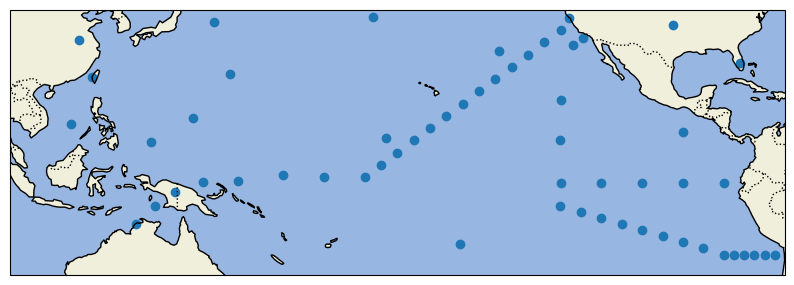

In [158]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)


lat_min = -45
lat_max = 45
lon_min = 100
lon_max = 290
geo_ds = geo.where((geo.lat > lat_min) & (geo.lat < lat_max) & (geo.lon > lon_min) & (geo.lon < lon_max), drop =True)


# data = ax.pcolormesh(nh_surface_data.longitude - 360, nh_surface_data.latitude,  nh_surface_data["skt"][0], transform=ccrs.PlateCarree(), cmap='coolwarm')
# data_sh = ax.pcolormesh(nh_surface_data.longitude - 360, nh_surface_data.latitude,  nh_surface_data["skt"][0], transform=ccrs.PlateCarree(), cmap='coolwarm')
# colorbar
# cbar = plt.colorbar(data, orientation='vertical', shrink=.5)

# plt.scatter((lons + 180) % 360 - 180, lats)
plt.scatter(geo_ds.lon+180, geo_ds.lat)
# for i, txt in enumerate([str(elt) for elt in sites.values]):
#     plt.annotate(txt, (lons[i]+180-1, lats[i]+1))

# ax.set_extent([-181, -70, -25, 33])

ax.set_extent([100, 290, -25, 40], crs=ccrs.PlateCarree())


In [ ]:
def get_horizontal_tendencies(lon, lat, column_ds):
    """Computes horizontal tendencies for temperature and specific humidity at a given location.
    Args:
    lon: site longitude
    lat: site latitude
    column_ds: xarray dataset containing ERA5 data at pressure levels 
    """
    west = column_ds.where((column_ds.latitude == lat) & (column_ds.longitude == lon - .25), drop = True).isel(latitude=0, longitude=0).squeeze()
    east = column_ds.where((column_ds.latitude == lat) & (column_ds.longitude == lon + .25), drop = True).isel(latitude=0, longitude=0).squeeze()
    north = column_ds.where((column_ds.latitude == lat + .25) & (column_ds.longitude == lon), drop = True).isel(latitude=0, longitude=0).squeeze()
    south = column_ds.where((column_ds.latitude == lat - .25) & (column_ds.longitude == lon), drop = True).isel(latitude=0, longitude=0).squeeze()
    center = column_ds.where((column_ds.latitude == lat) & (column_ds.longitude == lon), drop = True).isel(latitude=0, longitude=0).squeeze()
    
    # convert to radians for gradient calculation 
    rearth = 6378e3
    lat = np.deg2rad(lat)
    # lon = np.deg2rad(lon - 360)
    coslat = np.cos(lat)
    dx = 2 * np.pi * rearth * coslat / 360 # per degree longitude
    dy = 2 * np.pi * rearth / 360 # per degree latitude

    # compute advective tendencies
    # Temperature
    tntha = center.u * (west.t - 2 * center.t + east.t) / (2 * dx / 4) + center.v * (south.t - 2 * center.t + north.t) / (2 * dy / 4)
    # specific humidity
    tnhusha = center.u * (west.q - 2 * center.q + east.q) / (2 * dx / 4) + center.v * (south.q - 2 * center.q + north.q) / (2 * dy / 4)

    return tntha, tnhusha

#get_tendencies(lon, lat, col)[0]

def get_vertical_tendencies(column_ds, var, vertvar = "wa"):
    """
    Calculate the temperature and specific humidity vertical tendencies as a function of levels
    using vertical advection.
    """
    tntva_trend = []
    # Loop through each pressure level
    num_levels = column_ds[vertvar].shape[0]  # Number of vertical levels

    for i in range(num_levels):
        if i == 0:  # Bottom level (forward difference)
            tntva = column_ds[vertvar][i] * (column_ds[var][i+1] - column_ds[var][i]) / (column_ds.z[i+1] - column_ds.z[i])
        
        elif i == num_levels - 1:  # Top level (backward difference)
            tntva = column_ds[vertvar][i] * (column_ds[var][i] - column_ds[var][i-1]) / (column_ds.z[i] - column_ds.z[i-1])
        
        else:  # Middle levels (surface_dsed difference)
            tntva = column_ds[vertvar][i] * (column_ds[var][i+1] - 2 * column_ds[var][i] +  column_ds[var][i-1]) / ((column_ds.z[i+1] - column_ds.z[i-1]))

        tntva = tntva.assign_coords(pressure_level=column_ds.pressure_level[i])

        # Append the result to the trend list
        tntva_trend.append(tntva)
    
    # Convert the trend list to an xarray object, correctly indexed by pressure levels
    tntva_trend = xr.concat(tntva_trend, dim="pressure_level")
    tntva_trend = tntva_trend.assign_coords(pressure_level=column_ds.pressure_level)

    # transpose so time is the first dimension
    #tntva_trend = tntva_trend.transpose("date", "pressure_level")

    return tntva_trend

def get_forcing_data(cfsite, column_ds, surface_ds, geo = geo):
    loc = geo.where(geo["site"] == cfsite, drop = True)
    lat = np.round(loc.lat.values[0] / .25) * .25
    lon = np.round(loc.lon.values[0] / .25) * .25

    sitesf = surface_ds.where((surface_ds.latitude == lat) & (surface_ds.longitude == lon), drop = True)
    sitecol = column_ds.where((column_ds.latitude == lat) & (column_ds.longitude == lon), drop = True)
    # return sitesf, sitecol
    ##### get column data #####
    # compute temperature
    R_d = 287.05  # Specific gas constant for dry air (J/(kg·K))
    g = 9.807  # Gravitational acceleration (m/s²)
    pressure = sitecol.pressure_level * 100  # Convert to Pa
    pressure_broadcasted = pressure.broadcast_like(column_ds.t)
    # Compute air density using the ideal gas law: rho = P / (R_d * T)
    rho = pressure_broadcasted / (R_d * column_ds.t)
    sitecol["rho"] = rho


    ##### get surface data #####
    #coszen = xr.open_dataset("/Users/julianschmitt/Downloads/HadGEM2-A_amip.2004-2008.07.nc", group = f"site{group}").coszen
    # sitecol["coszen"] = coszen
    coszen = geo.where(geo["site"] == cfsite, drop = True)

    # rescale TOA incident radiation to w/m2 by dividing by the time step of ERA5 (1 hour)
    sitesf["tisr"] = sitesf["tisr"] / tisr_resolution

    #### Combine data ####
    sitedata = xr.merge([sitecol[["z", "t", "rho", "u", "v", "w", "q"]], 
                         sitesf[["slhf", "sshf", "tisr", "skt"]],
                         coszen[["coszen"]]])

    sitedata = sitedata.rename({"t": "ta", "u": "ua", "v": "va", "w": "wa", "q": "hus", "slhf": "hfls", "sshf": "hfss", "skt": "ts", "tisr": "rsdt", "z": "zg"})
    sitedata["z"] = sitedata["zg"] / g # convert geopotential (zg) to height in meters (z)

    # remove latitude/longitude dependence - not actually selecting a value on the meridian, just the first value of the array
    # return sitedata
    sitedata = sitedata.squeeze()
    # return sitedata

    # calculate tendency terms
    sitedata["wap"] = sitedata["wa"] * sitedata["rho"]
    # temperature vertical tendency due to vertical advection
    sitedata["tntva"] = get_vertical_tendencies(sitedata, "ta")
    # specific humidity vertical tendency due to vertical advection
    sitedata["tnhusva"] = get_vertical_tendencies(sitedata, "hus")


    # compute horizontal tendencies
    tntha, tnhusha = get_horizontal_tendencies(lon, lat, column_ds)

    sitedata["tntha"] = tntha
    sitedata["tnhusha"] = tnhusha
    
    return sitedata
tisr_resolution = 86400
t = get_forcing_data(23, pressure_avg.sel(month = 7), surface_avg.sel(month = 7), geo = xr.open_dataset("coszen_data.nc").sel(date = 7))

In [124]:
geo = xr.open_dataset("coszen_data.nc")
loc = geo.where(geo["site"] == 17, drop = True)
lat = np.round(loc.lat.values[0] / .25) * .25
lon = np.round(loc.lon.values[0] / .25) * .25
lat, lon

(35.0, 235.0)

In [166]:
# loop through months
for month in [1, 4, 7, 10]:
    output_file = f'era5_monthly_forcing_{month}.nc'

    pressure_ds = pressure_avg.sel(month = month, drop = True)
    surface_ds = surface_avg.sel(month = month, drop = True)
    geo_ds = geo.sel(date = month, drop=True)

    for site_id in geo_ds.site.values:
        print("Running site: ", site_id)
        try:
            site_data = get_forcing_data(site_id, pressure_ds, surface_ds, geo_ds)
            site_data.to_netcdf(output_file, mode='a', group=f'site{site_id}')
        except Exception as e:
            print(f"Error processing site {site_id}: {e}")



Running site:  1
Error processing site 1: index 0 is out of bounds for axis 1 with size 0
Running site:  2
Error processing site 2: shape of data does not conform to slice
Running site:  3
Running site:  4
Running site:  5
Running site:  6
Running site:  7
Running site:  8
Running site:  9
Running site:  10
Running site:  11
Running site:  12
Running site:  13
Running site:  14
Running site:  15
Running site:  16
Running site:  17
Running site:  18
Running site:  19
Running site:  20
Running site:  21
Running site:  22
Running site:  23
Running site:  24
Running site:  25
Running site:  26
Running site:  27
Running site:  28
Running site:  29
Running site:  30
Error processing site 30: index 0 is out of bounds for axis 1 with size 0
Running site:  31
Error processing site 31: index 0 is out of bounds for axis 1 with size 0
Running site:  32
Error processing site 32: index 0 is out of bounds for axis 1 with size 0
Running site:  33
Error processing site 33: index 0 is out of bounds for 

In [161]:
# actual data 


<xarray.Dataset> Size: 25GB
Dimensions:         (date: 96, pressure_level: 37, latitude: 359, longitude: 439)
Coordinates:
    number          int64 8B 0
  * date            (date) datetime64[ns] 768B 2000-01-01 ... 2023-10-01
  * pressure_level  (pressure_level) float64 296B 1e+03 975.0 950.0 ... 2.0 1.0
  * latitude        (latitude) float64 3kB 44.75 44.5 44.25 ... -44.5 -44.75
  * longitude       (longitude) float64 4kB 180.2 180.5 180.8 ... 289.5 289.8
    expver          (date) <U4 2kB dask.array<chunksize=(96,), meta=np.ndarray>
Data variables:
    cc              (date, pressure_level, latitude, longitude) float32 2GB dask.array<chunksize=(16, 6, 120, 240), meta=np.ndarray>
    z               (date, pressure_level, latitude, longitude) float32 2GB dask.array<chunksize=(16, 6, 120, 240), meta=np.ndarray>
    r               (date, pressure_level, latitude, longitude) float32 2GB dask.array<chunksize=(16, 6, 120, 240), meta=np.ndarray>
    ciwc            (date, pressure_level, latitude, longitude) float32 2GB dask.array<chunksize=(16, 6, 120, 240), meta=np.ndarray>
    clwc            (date, pressure_level, latitude, longitude) float32 2GB dask.array<chunksize=(16, 6, 120, 240), meta=np.ndarray>
    q               (date, pressure_level, latitude, longitude) float32 2GB dask.array<chunksize=(16, 6, 120, 240), meta=np.ndarray>
    crwc            (date, pressure_level, latitude, longitude) float32 2GB dask.array<chunksize=(16, 6, 120, 240), meta=np.ndarray>
    t               (date, pressure_level, latitude, longitude) float32 2GB dask.array<chunksize=(16, 6, 120, 240), meta=np.ndarray>
    u               (date, pressure_level, latitude, longitude) float32 2GB dask.array<chunksize=(16, 6, 120, 240), meta=np.ndarray>
    v               (date, pressure_level, latitude, longitude) float32 2GB dask.array<chunksize=(16, 6, 120, 240), meta=np.ndarray>
    w               (date, pressure_level, latitude, longitude) float32 2GB dask.array<chunksize=(16, 6, 120, 240), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-30T04:48 GRIB to CDM+CF via cfgrib-0.9.1...

In [152]:
# select a date
for month in [7]:
    output_file = f"era5_forcing_{month}.nc"

    pressure_ds = pressure_avg.sel(month = month, drop = True)
    surface_ds = surface_avg.sel(month = month, drop = True)

    # get forcing data for each site
    for site_id in range(2, 32):
        # Get the dataset for the current site
        print("Running site: ", site_id)
        site_data = get_forcing_data(site_id, pressure_ds, surface_ds)
        site_data.to_netcdf(output_file, mode='a', group=f'site{site_id}')



Running site:  2
Running site:  3
Running site:  4
Running site:  5
Running site:  6
Running site:  7
Running site:  8
Running site:  9
Running site:  10
Running site:  11
Running site:  12
Running site:  13
Running site:  14
Running site:  15
Running site:  16
Running site:  17
Running site:  18
Running site:  19
Running site:  20
Running site:  21
Running site:  22
Running site:  23
Running site:  24
Running site:  25
Running site:  26
Running site:  27
Running site:  28
Running site:  29
Running site:  30


IndexError: index 0 is out of bounds for axis 1 with size 0

In [262]:
# Path to the NetCDF file
output_file = 'era5_forcing_v2.nc'

# Loop over site IDs (from 2 to 23)
for site_id in range(18, 24):
    # Get the dataset for the current site
    ds = get_forcing_data(site_id)
    
    # Save the dataset to the NetCDF file as a group named "siteXX" (e.g., "site2", "site3", ...)
    ds.to_netcdf(output_file, mode='a', group=f'site{site_id}')

In [77]:
# geo.sel((site))

# read in geo data 
geo2 = xr.open_dataset("coszen_data.nc")
geo2.where((geo2.site ==23) & (geo2.time ==7), drop = True).coszen.values[0][0]

0.7807784044510366

In [258]:
t.tntva.transpose("valid_time", "pressure_level")

<xarray.DataArray 'tntva' (valid_time: 120, pressure_level: 37)> Size: 18kB
array([[ 1.13214583e-05,  3.28581041e-06,  6.32270712e-07, ...,
        -4.76388540e-10, -9.12637930e-08, -8.15055188e-08],
       [ 2.09156242e-05, -2.67250380e-06, -1.36519105e-07, ...,
         8.09162515e-09, -6.07112298e-08, -4.79207785e-08],
       [-2.00305458e-05,  9.94249058e-06,  1.78424784e-06, ...,
         2.76138117e-08,  2.80262231e-08, -1.01943748e-07],
       ...,
       [-6.92377216e-06, -2.82568480e-09,  1.63513721e-06, ...,
         9.36802103e-09, -1.26465274e-08,  1.04942636e-07],
       [-4.72262309e-06,  8.60594184e-07, -6.18995159e-07, ...,
         9.04208486e-10, -4.03917468e-08,  9.70789387e-08],
       [-4.90594321e-05,  1.81263590e-06,  1.09453358e-05, ...,
        -1.10742207e-07,  1.39435585e-07,  1.13329662e-07]], dtype=float32)
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 960B 2008-07-01 ... 2008-07-0...
  * pressure_level  (pressure_level) float64 296B 1e+03 975.0 950.0 ... 2.0 1.0
    latitude        float64 8B 32.0
    longitude       float64 8B -129.0
    number          int64 8B 0
    expver          (valid_time) <U4 2kB '0001' '0001' '0001' ... '0001' '0001'
    lon             float32 4B ...
    lat             float32 4B ...
    site            int32 4B ...

In [248]:
t.tntha.values.shape

(120, 37)

In [235]:
hadgem.tntha

<xarray.DataArray 'tntha' (time: 600, lev: 38)> Size: 91kB
array([[-1.632074e-05, -1.798655e-05, -1.829345e-05, ..., -6.050564e-05,
         7.917081e-05,  1.042462e-05],
       [-9.230890e-06, -9.422567e-06, -9.685845e-06, ..., -1.547076e-06,
        -8.380666e-06, -1.781699e-05],
       [-1.156452e-05, -1.216406e-05, -1.237467e-05, ...,  2.907143e-05,
        -4.025018e-05, -4.217114e-06],
       ...,
       [-1.447636e-05, -1.656419e-05, -1.706068e-05, ...,  2.163953e-05,
        -7.171408e-05, -2.734287e-05],
       [-1.665831e-05, -1.913429e-05, -1.919993e-05, ...,  5.117800e-05,
        -4.376223e-05, -1.263740e-05],
       [-2.447590e-05, -2.852176e-05, -2.935004e-05, ..., -1.974220e-05,
        -2.197325e-06,  3.575737e-05]], dtype=float32)
Coordinates:
    lon      float32 4B ...
    lat      float32 4B ...
    site     int32 4B ...
  * lev      (lev) float64 304B 20.0 80.0 180.0 ... 3.291e+04 3.925e+04
  * time     (time) object 5kB 2004-07-01 00:00:00 ... 2008-07-30 18:00:00

In [116]:
rearth = 6378e3
lat = np.deg2rad(t.latitude)
lon = np.deg2rad(t.longitude)
coslat = np.cos(lat)
dx = 2 * np.pi * rearth * coslat / 360 # per degree longitude
dy = 2 * np.pi * rearth / 360 # per degree latitude

tloc = geo.where(geo["site"] == 23, drop = True)
lat = tloc.lat.values[0]
lon = tloc.lon.values[0] - 360
west = col.where((col.latitude == lat) & (col.longitude == lon - .25), drop = True).isel(latitude=0, longitude=0).squeeze()
east = col.where((col.latitude == lat) & (col.longitude == lon + .25), drop = True).isel(latitude=0, longitude=0).squeeze()
north = col.where((col.latitude == lat + .25) & (col.longitude == lon), drop = True).isel(latitude=0, longitude=0).squeeze()
south = col.where((col.latitude == lat - .25) & (col.longitude == lon), drop = True).isel(latitude=0, longitude=0).squeeze()
center = col.where((col.latitude == lat) & (col.longitude == lon), drop = True).isel(latitude=0, longitude=0).squeeze()

tntha = center.u * (west.t - 2 * center.t + east.t) / (2 * dx / 4) + center.v * (south.t - 2 * center.t + north.t) / (2 * dy / 4)

# repeat for q 
tnhusha = center.u * (west.q - 2 * center.q + east.q) / (2 * dx / 4) + center.v * (south.q - 2 * center.q + north.q) / (2 * dy / 4)

# compute the verical advection
tntva_trend = calc_vertical_tendencies(center, "t")

<xarray.DataArray 'z' (valid_time: 120, pressure_level: 37)> Size: 18kB
array([[  1331.6484,   3483.1177,   5674.494 , ..., 388714.    ,
        418602.8   , 470359.3   ],
       [  1278.4648,   3431.1123,   5623.478 , ..., 388647.12  ,
        418575.38  , 470422.5   ],
       [  1261.1094,   3414.6917,   5608.047 , ..., 388815.06  ,
        418784.2   , 470680.5   ],
       ...,
       [  1412.375 ,   3568.8599,   5765.5547, ..., 388575.88  ,
        418358.62  , 470618.06  ],
       [  1383.9883,   3541.3862,   5738.8984, ..., 388694.56  ,
        418277.62  , 470671.12  ],
       [  1347.4336,   3505.8337,   5704.082 , ..., 388663.    ,
        418220.12  , 470703.75  ]], dtype=float32)
Coordinates:
    number          int64 8B 0
  * valid_time      (valid_time) datetime64[ns] 960B 2008-07-01 ... 2008-07-0...
  * pressure_level  (pressure_level) float64 296B 1e+03 975.0 950.0 ... 2.0 1.0
    latitude        float64 8B 17.0
    longitude       float64 8B -149.0
    expver          (valid_time) <U4 2kB ...
Attributes: (12/31)
    GRIB_paramId:                             129
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      25521
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           z
    GRIB_totalNumber:                         0
    GRIB_units:                               m**2 s**-2
    long_name:                                Geopotential
    units:                                    m**2 s**-2
    standard_name:                            geopotential

In [183]:

def calc_vertical_tendencies(center, var):
    """
    Calculate the temperature and specific humidity tendencies as a function of levels
    using vertical advection.
    """
    tntva_trend = []
    
    # Loop through each pressure level
    num_levels = center.w.shape[1]  # Number of vertical levels

    for i in range(num_levels):
        if i == 0:  # Bottom level (forward difference)
            tntva = center.w[:, i] * (center[var][:, i+1] - center[var][:, i]) / (center.z[:, i+1] - center.z[:, i])
        
        elif i == num_levels - 1:  # Top level (backward difference)
            tntva = center.w[:, i] * (center[var][:, i] - center[var][:, i-1]) / (center.z[:, i] - center.z[:, i-1])
        
        else:  # Middle levels (centered difference)
            tntva = center.w[:, i] * (center[var][:, i+1] - 2 * center[var][:, i] +  center[var][:, i-1]) / ((center.z[:, i+1] - center.z[:, i-1]))

        tntva = tntva.assign_coords(pressure_level=center.pressure_level[i])

        # Append the result to the trend list
        tntva_trend.append(tntva)
    
    # Convert the trend list to an xarray object, correctly indexed by pressure levels
    tntva_trend = xr.concat(tntva_trend, dim="pressure_level")
    tntva_trend = tntva_trend.assign_coords(pressure_level=center.pressure_level)

    return tntva_trend

tntva_trend = calc_vertical_tendencies(center, "t")

In [219]:
tntva_trend[0, :]

<xarray.DataArray (valid_time: 120)> Size: 480B
array([-2.75144557e-05,  1.35491928e-05,  3.14463650e-05,  8.59203192e-06,
       -1.60025975e-05, -1.38804216e-05, -2.29897614e-05, -2.50588128e-05,
       -7.53809309e-06,  1.22636975e-05,  1.21097155e-05,  1.92687321e-06,
        1.04373985e-05, -1.36060899e-05, -1.02260447e-05,  4.32611751e-06,
       -2.85788446e-05, -3.64474145e-05, -1.79881627e-05, -3.58524703e-05,
        7.15926717e-06, -3.07732830e-06,  1.03530592e-05,  2.64056198e-05,
       -1.71744307e-06,  7.48241746e-06,  1.75734731e-05, -1.90777937e-05,
       -7.05608454e-06, -1.76476278e-05, -1.00879588e-05, -1.67713351e-05,
       -1.33250060e-05, -9.56202894e-06,  2.15840973e-05,  2.91410902e-06,
        7.79607126e-06,  4.27205032e-06, -4.22092489e-06,  8.11095742e-06,
       -7.18998535e-06, -2.17289671e-05, -3.07520850e-06, -9.77857144e-06,
        1.68057941e-05,  3.33504722e-05,  3.41838677e-05,  3.56484015e-05,
        5.41603185e-05,  4.73543550e-05,  3.70824891e-05,  1.12800390e-05,
        1.92404259e-05, -8.34853381e-06, -7.46132673e-06, -1.74788911e-05,
       -7.03457727e-06,  6.51279106e-06,  1.12591115e-05,  5.38481436e-06,
       -9.22038362e-06,  4.06920799e-06, -1.81141306e-08, -7.35314779e-06,
       -1.78748505e-05, -3.06587317e-05, -1.41545406e-05, -2.66130137e-05,
       -2.10347407e-05, -2.55157029e-05, -7.22851337e-06,  2.91687365e-06,
        1.44106407e-05,  5.81608356e-06,  1.56801852e-05, -2.20925249e-05,
       -7.11406028e-06, -3.42401945e-05, -2.64726696e-05, -3.49330803e-05,
       -1.21100011e-05,  1.60531931e-06, -8.85945610e-07,  2.66165735e-05,
        1.73640419e-05,  1.57283066e-05,  4.85436476e-06, -1.08868680e-05,
       -3.56126407e-06, -3.72720388e-06,  3.32267564e-06,  1.95030025e-05,
        2.31874255e-05,  1.84915916e-05, -5.28589226e-06,  3.44304244e-05,
        2.87175681e-05,  1.72959117e-05,  3.57585377e-05,  1.62632247e-07,
        7.90622562e-06, -2.19734120e-05, -3.53662581e-05, -1.84957553e-05,
        3.13615192e-06,  2.37965633e-05,  1.88316735e-05,  9.90199078e-06,
        2.07190569e-05, -2.03444756e-06, -2.71138306e-05, -5.63927279e-06,
       -3.87694818e-05, -1.77408001e-05, -1.95128541e-05, -3.14054705e-06,
       -3.66543486e-06, -4.97243173e-06,  1.33256472e-05, -1.39520507e-05],
      dtype=float32)
Coordinates:
    number          int64 8B 0
  * valid_time      (valid_time) datetime64[ns] 960B 2008-07-01 ... 2008-07-0...
    latitude        float64 8B 17.0
    longitude       float64 8B -149.0
    expver          (valid_time) <U4 2kB '0001' '0001' '0001' ... '0001' '0001'
    pressure_level  float64 8B 1e+03

In [218]:
hadgem.tntva[:, -4]

<xarray.DataArray 'tntva' (time: 600)> Size: 2kB
array([ 1.901959e-05,  1.674047e-06, -2.395650e-06, ..., -1.414173e-06,
        1.506024e-06,  2.877714e-06], dtype=float32)
Coordinates:
    lon      float32 4B ...
    lat      float32 4B ...
    site     int32 4B ...
    lev      float64 8B 2.658e+04
  * time     (time) object 5kB 2004-07-01 00:00:00 ... 2008-07-30 18:00:00

In [98]:
# functionalize the tendency calculations 
def get_tendencies(lon, lat, col):
    west = col.where((col.latitude == lat) & (col.longitude == lon - .25), drop = True).isel(latitude=0, longitude=0).squeeze()
    east = col.where((col.latitude == lat) & (col.longitude == lon + .25), drop = True).isel(latitude=0, longitude=0).squeeze()
    north = col.where((col.latitude == lat + .25) & (col.longitude == lon), drop = True).isel(latitude=0, longitude=0).squeeze()
    south = col.where((col.latitude == lat - .25) & (col.longitude == lon), drop = True).isel(latitude=0, longitude=0).squeeze()
    center = col.where((col.latitude == lat) & (col.longitude == lon), drop = True).isel(latitude=0, longitude=0).squeeze()
    
    # convert to radians for gradient calculation 
    rearth = 6378e3
    lat = np.deg2rad(lat)
    lon = np.deg2rad(lon - 360)
    coslat = np.cos(lat)
    dx = 2 * np.pi * rearth * coslat / 360 # per degree longitude
    dy = 2 * np.pi * rearth / 360 # per degree latitude

    # compute advective tendencies
    # Temperature
    tntha = center.u * (west.t - 2 * center.t + east.t) / (2 * dx / 4) + center.v * (south.t - 2 * center.t + north.t) / (2 * dy / 4)
    # specific humidity
    tnhusha = center.u * (west.q - 2 * center.q + east.q) / (2 * dx / 4) + center.v * (south.q - 2 * center.q + north.q) / (2 * dy / 4)

    return tntha, tnhusha

get_tendencies(lon, lat, col)[0]


<xarray.DataArray (valid_time: 120, pressure_level: 37)> Size: 18kB
array([[-4.4340331e-06, -7.0144038e-06, -9.2385226e-06, ...,
         2.1226107e-05, -8.9030027e-07, -3.5042158e-05],
       [-3.3164058e-06, -5.3600434e-06, -8.4528019e-06, ...,
         1.9916457e-05, -1.9385978e-05,  4.2046308e-06],
       [ 6.8233788e-08, -2.1901976e-06, -6.7764850e-06, ...,
         1.1896117e-05, -1.4619983e-05,  3.8080692e-05],
       ...,
       [ 4.3163891e-07, -2.7534777e-06, -2.4839032e-06, ...,
         1.4321859e-06,  1.1797360e-05, -9.0727990e-06],
       [ 6.1274943e-07, -3.0444971e-06, -8.8684010e-06, ...,
         2.3764978e-06,  2.0278125e-05, -4.7086969e-06],
       [-2.6430936e-07, -5.7508255e-06, -1.3844690e-05, ...,
        -3.7713045e-05,  1.0529745e-05,  4.9639984e-06]], dtype=float32)
Coordinates:
    number          int64 8B 0
  * valid_time      (valid_time) datetime64[ns] 960B 2008-07-01 ... 2008-07-0...
  * pressure_level  (pressure_level) float64 296B 1e+03 975.0 950.0 ... 2.0 1.0
    latitude        float64 8B 17.0
    expver          (valid_time) <U4 2kB '0001' '0001' '0001' ... '0001' '0001'
    longitude       float64 8B -149.0

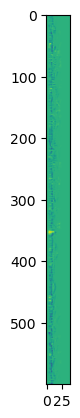

In [104]:
plt.imshow(hadgem.tnhusva.values)

In [90]:
tntha

<xarray.DataArray (valid_time: 120, pressure_level: 37)> Size: 36kB
array([[-4.43403323e-06, -7.01440341e-06, -9.23852244e-06, ...,
         2.12261060e-05, -8.90300442e-07, -3.50421560e-05],
       [-3.31640580e-06, -5.36004365e-06, -8.45280185e-06, ...,
         1.99164564e-05, -1.93859772e-05,  4.20463114e-06],
       [ 6.82338028e-08, -2.19019775e-06, -6.77648490e-06, ...,
         1.18961167e-05, -1.46199829e-05,  3.80806908e-05],
       ...,
       [ 4.31638788e-07, -2.75347766e-06, -2.48390316e-06, ...,
         1.43218614e-06,  1.17973599e-05, -9.07279893e-06],
       [ 6.12749492e-07, -3.04449714e-06, -8.86840075e-06, ...,
         2.37649783e-06,  2.02781243e-05, -4.70869694e-06],
       [-2.64309361e-07, -5.75082534e-06, -1.38446907e-05, ...,
        -3.77130453e-05,  1.05297455e-05,  4.96399803e-06]])
Coordinates:
    number          int64 8B 0
  * valid_time      (valid_time) datetime64[ns] 960B 2008-07-01 ... 2008-07-0...
  * pressure_level  (pressure_level) float64 296B 1e+03 975.0 950.0 ... 2.0 1.0
    latitude        float64 8B 17.0
    expver          (valid_time) <U4 2kB '0001' '0001' '0001' ... '0001' '0001'
    longitude       float64 8B -149.0
    lon             float32 4B ...
    lat             float32 4B ...
    site            int32 4B ...

In [198]:
sf

<xarray.Dataset> Size: 86MB
Dimensions:     (valid_time: 120, latitude: 141, longitude: 181)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 960B 2008-07-01 ... 2008-07-05T23...
  * latitude    (latitude) float64 1kB 35.0 34.75 34.5 34.25 ... 0.5 0.25 0.0
  * longitude   (longitude) float64 1kB -155.0 -154.8 -154.5 ... -110.2 -110.0
    expver      (valid_time) <U4 2kB ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 12MB ...
    sst         (valid_time, latitude, longitude) float32 12MB ...
    tp          (valid_time, latitude, longitude) float32 12MB ...
    skt         (valid_time, latitude, longitude) float32 12MB ...
    slhf        (valid_time, latitude, longitude) float32 12MB ...
    sshf        (valid_time, latitude, longitude) float32 12MB ...
    tisr        (valid_time, latitude, longitude) float32 12MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-04T22:15 GRIB to CDM+CF via cfgrib-0.9.1...

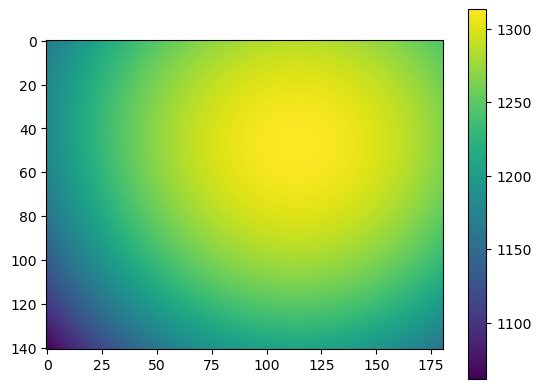

In [216]:
plt.imshow(sf.tisr[21]/3600)
plt.colorbar()

In [260]:
# Path to the NetCDF file
output_file = 'era5_forcing_v2.nc'

# Loop over site IDs (from 2 to 23)
for site_id in range(18, 24):
    # Get the dataset for the current site
    ds = get_forcing_data(site_id)
    
    # Save the dataset to the NetCDF file as a group named "siteXX" (e.g., "site2", "site3", ...)
    ds.to_netcdf(output_file, mode='a', group=f'site{site_id}')

In [236]:
test_ds = xr.open_dataset("era5_forcing.nc", group = "site23")
test_ds

<xarray.Dataset> Size: 147kB
Dimensions:         (valid_time: 120, pressure_level: 37)
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 960B 2008-07-01 ... 2008-07-0...
  * pressure_level  (pressure_level) float64 296B 1e+03 975.0 950.0 ... 2.0 1.0
    latitude        float64 8B ...
    longitude       float64 8B ...
    number          int64 8B ...
    expver          (valid_time) <U4 2kB ...
    lon             float32 4B ...
    lat             float32 4B ...
    site            int32 4B ...
Data variables:
    z               (valid_time, pressure_level) float32 18kB ...
    ta              (valid_time, pressure_level) float32 18kB ...
    rho             (valid_time, pressure_level) float64 36kB ...
    ua              (valid_time, pressure_level) float32 18kB ...
    va              (valid_time, pressure_level) float32 18kB ...
    wa              (valid_time, pressure_level) float32 18kB ...
    hus             (valid_time, pressure_level) float32 18kB ...
    coszen          float32 4B ...
    hfls            (valid_time) float32 480B ...
    hfss            (valid_time) float32 480B ...
    tisr            (valid_time) float32 480B ...
    ts              (valid_time) float32 480B ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-05T09:34 GRIB to CDM+CF via cfgrib-0.9.1...

In [123]:
# group the data
group = 17
loc = geo.where(geo["site"] == group, drop = True)
site17sf = sf.where((sf.latitude == loc.lat.values[0]) & (sf.longitude == loc.lon.values[0] - 360), drop = True)
site17col = col.where((col.latitude == loc.lat.values[0]) & (col.longitude == loc.lon.values[0] - 360), drop = True)

In [58]:
loc

NameError: name 'loc' is not defined

In [ ]:
R_d = 287.05  # Specific gas constant for dry air (J/(kg·K))
g = 9.81  # Gravitational acceleration (m/s²)

# Convert pressure from hPa to Pa (1 hPa = 100 Pa)
pressure = col.pressure_level * 100  # Convert to Pa
pressure_broadcasted = pressure.broadcast_like(col.t)
# Compute air density using the ideal gas law: rho = P / (R_d * T)
rho = pressure_broadcasted / (R_d * col.t)

# Add the computed density to the dataset
col['rho'] = rho

In [199]:
# ta, ua, va, hus, alpha/rho, - initial profiles 
# ts, hfls, hfss, coszen, rsdt
col[['z', 't', 'rho', 'u', 'v', 'q']]

ts = site17sf["t2m"] + 2 * (9.8/1000) # approximate surface temperature with dry lapse rate
sf[["slhf", "sshf", "tisr"]]
col["coszen"] = hadgem.coszen

forcing_data = xr.merge([col[["z", "t", "rho", "u", "v", "q", "coszen"]], sf[["slhf", "sshf", "tisr"]]])




<xarray.Dataset> Size: 3GB
Dimensions:         (valid_time: 120, pressure_level: 37, latitude: 141,
                     longitude: 181)
Coordinates:
    number          int64 8B 0
  * valid_time      (valid_time) datetime64[ns] 960B 2008-07-01 ... 2008-07-0...
  * pressure_level  (pressure_level) float64 296B 1e+03 975.0 950.0 ... 2.0 1.0
  * latitude        (latitude) float64 1kB 35.0 34.75 34.5 ... 0.5 0.25 0.0
  * longitude       (longitude) float64 1kB -155.0 -154.8 ... -110.2 -110.0
    expver          (valid_time) <U4 2kB '0001' '0001' '0001' ... '0001' '0001'
    lon             float32 4B 211.0
    lat             float32 4B ...
    site            int32 4B ...
Data variables:
    z               (valid_time, pressure_level, latitude, longitude) float32 453MB ...
    t               (valid_time, pressure_level, latitude, longitude) float32 453MB ...
    rho             (valid_time, pressure_level, latitude, longitude) float64 907MB ...
    u               (valid_time, pressure_level, latitude, longitude) float32 453MB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 453MB ...
    q               (valid_time, pressure_level, latitude, longitude) float32 453MB ...
    coszen          float32 4B 0.7812
    slhf            (valid_time, latitude, longitude) float32 12MB ...
    sshf            (valid_time, latitude, longitude) float32 12MB ...
    tisr            (valid_time, latitude, longitude) float32 12MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-05T09:34 GRIB to CDM+CF via cfgrib-0.9.1...

In [237]:
hadgem

<xarray.Dataset> Size: 2MB
Dimensions:    (lev: 38, time: 600)
Coordinates:
    lon        float32 4B 211.0
    lat        float32 4B ...
    site       int32 4B ...
  * lev        (lev) float64 304B 20.0 80.0 180.0 ... 3.291e+04 3.925e+04
  * time       (time) object 5kB 2004-07-01 00:00:00 ... 2008-07-30 18:00:00
Data variables: (12/40)
    zg         (time, lev) float32 91kB ...
    ta         (time, lev) float32 91kB 296.8 296.2 295.2 ... 227.9 232.2 264.3
    hus        (time, lev) float32 91kB ...
    ua         (time, lev) float32 91kB ...
    va         (time, lev) float32 91kB ...
    wap        (time, lev) float32 91kB ...
    ...         ...
    gustiness  float32 4B ...
    windstd    float32 4B ...
    windrms    float32 4B ...
    clwvi      (time) float32 2kB ...
    clivi      (time) float32 2kB ...
    lwp3000    (time) float32 2kB ...

In [132]:
site17col[["t", "q", "u", "v"]]

<xarray.Dataset> Size: 74kB
Dimensions:         (valid_time: 120, pressure_level: 37, latitude: 1,
                     longitude: 1)
Coordinates:
    number          int64 8B 0
  * valid_time      (valid_time) datetime64[ns] 960B 2008-07-01 ... 2008-07-0...
  * pressure_level  (pressure_level) float64 296B 1e+03 975.0 950.0 ... 2.0 1.0
  * latitude        (latitude) float64 8B 35.0
  * longitude       (longitude) float64 8B -125.0
    expver          (valid_time) <U4 2kB ...
Data variables:
    t               (valid_time, pressure_level, latitude, longitude) float32 18kB ...
    q               (valid_time, pressure_level, latitude, longitude) float32 18kB ...
    u               (valid_time, pressure_level, latitude, longitude) float32 18kB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 18kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-05T09:34 GRIB to CDM+CF via cfgrib-0.9.1...

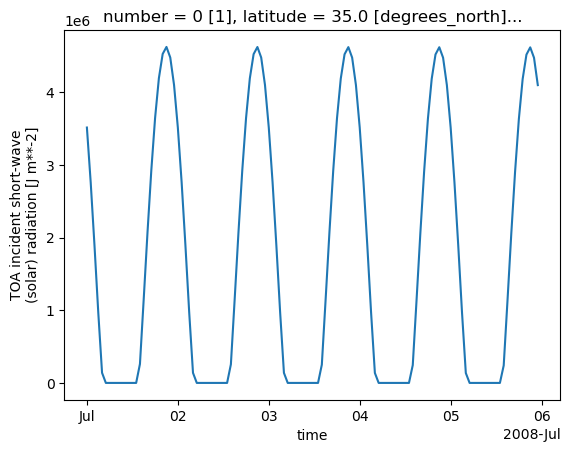

In [95]:
site17data["tisr"].plot()

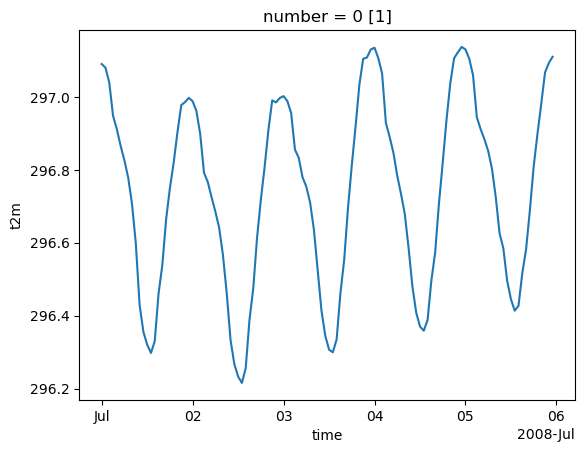

In [97]:
sf.mean(dim = ["latitude", "longitude"])["t2m"].plot()

In [5]:
# now lets do this in temperature uni

# lets get the data in hadgem form 
hadgem = xr.open_dataset("/Users/julianschmitt/Downloads/HadGEM2-A_amip.2004-2008.07.nc", group = "site23")

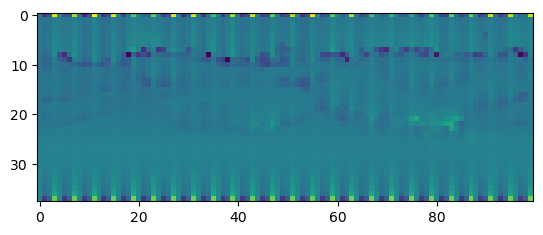

In [12]:
# ta, ua, va, hus, alpha/rho, - initial profiles 
# ts, hfls, hfss, coszen, rsdt
plt.imshow(np.transpose(hadgem.tntr.values[:100, :]))

In [148]:
1/ hadgem.alpha.values[0, :]

array([1.1791223 , 1.1735959 , 1.1641325 , 1.1508752 , 1.1339201 ,
       1.1131504 , 1.0848188 , 1.0548562 , 1.0210884 , 0.9830358 ,
       0.9223374 , 0.88197744, 0.836112  , 0.7931723 , 0.7482449 ,
       0.70319986, 0.6556908 , 0.6106781 , 0.5688524 , 0.5223333 ,
       0.47889155, 0.43583542, 0.3916802 , 0.34959084, 0.31037554,
       0.27361238, 0.23867404, 0.20519851, 0.16413954, 0.13068715,
       0.10224383, 0.07876343, 0.05908536, 0.04374693, 0.03101151,
       0.02049693, 0.01168244, 0.00408555], dtype=float32)

In [153]:
col.z.values[0, :, 0, 0]

array([  1676.1484,   3788.7427,   5940.244 ,   8132.7617,  10368.523 ,
        12652.445 ,  15011.297 ,  17445.86  ,  19950.809 ,  22533.078 ,
        25200.027 ,  30788.105 ,  36737.285 ,  43113.73  ,  49994.168 ,
        57410.38  ,  65444.477 ,  74220.06  ,  83867.69  ,  94621.5   ,
       106856.31  , 113691.69  , 121129.44  , 129327.375 , 138553.88  ,
       149342.69  , 162500.38  , 183798.25  , 204391.44  , 236328.    ,
       262363.2   , 308149.75  , 332347.88  , 355682.5   , 392348.    ,
       422554.8   , 475291.3   ], dtype=float32)

In [276]:
col

<xarray.Dataset> Size: 6GB
Dimensions:         (valid_time: 120, pressure_level: 37, latitude: 141,
                     longitude: 181)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 960B 2008-07-01 ... 2008-07-0...
  * pressure_level  (pressure_level) float64 296B 1e+03 975.0 950.0 ... 2.0 1.0
  * latitude        (latitude) float64 1kB 35.0 34.75 34.5 ... 0.5 0.25 0.0
  * longitude       (longitude) float64 1kB -155.0 -154.8 ... -110.2 -110.0
    expver          (valid_time) <U4 2kB ...
Data variables: (12/13)
    d               (valid_time, pressure_level, latitude, longitude) float32 453MB ...
    cc              (valid_time, pressure_level, latitude, longitude) float32 453MB ...
    z               (valid_time, pressure_level, latitude, longitude) float32 453MB ...
    r               (valid_time, pressure_level, latitude, longitude) float32 453MB ...
    ciwc            (valid_time, pressure_level, latitude, longitude) float32 453MB ...
    clwc            (valid_time, pressure_level, latitude, longitude) float32 453MB ...
    ...              ...
    crwc            (valid_time, pressure_level, latitude, longitude) float32 453MB ...
    t               (valid_time, pressure_level, latitude, longitude) float32 453MB ...
    u               (valid_time, pressure_level, latitude, longitude) float32 453MB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 453MB ...
    w               (valid_time, pressure_level, latitude, longitude) float32 453MB ...
    vo              (valid_time, pressure_level, latitude, longitude) float32 453MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-05T09:34 GRIB to CDM+CF via cfgrib-0.9.1...

In [292]:
geo.where((geo["site"] >=16) & (geo["site"] <= 23), drop = True).lat.max() 

<xarray.DataArray 'lat' ()> Size: 4B
array(38.1, dtype=float32)

In [279]:
# new download datasets
# these are for the southern hemisphere forcing
ds = xr.open_dataset("~/Downloads/era5/col_SHcf.nc")
ds_sf = xr.open_dataset("~/Downloads/era5/surface_SHcf.nc")
ds_sf

<xarray.Dataset> Size: 43MB
Dimensions:     (valid_time: 120, latitude: 57, longitude: 225)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 960B 2008-07-01 ... 2008-07-05T23...
  * latitude    (latitude) float64 456B -7.0 -7.25 -7.5 ... -20.5 -20.75 -21.0
  * longitude   (longitude) float64 2kB -127.0 -126.8 -126.5 ... -71.25 -71.0
    expver      (valid_time) <U4 2kB ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 6MB ...
    sst         (valid_time, latitude, longitude) float32 6MB ...
    tp          (valid_time, latitude, longitude) float32 6MB ...
    skt         (valid_time, latitude, longitude) float32 6MB ...
    slhf        (valid_time, latitude, longitude) float32 6MB ...
    sshf        (valid_time, latitude, longitude) float32 6MB ...
    tisr        (valid_time, latitude, longitude) float32 6MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-09T17:33 GRIB to CDM+CF via cfgrib-0.9.1...

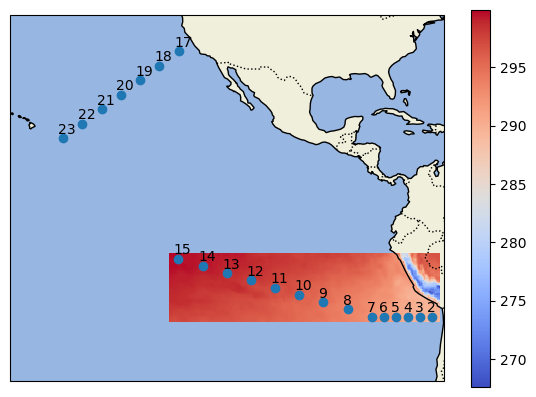

In [280]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)

data = ax.pcolormesh(ds_sf.longitude - 360, ds_sf.latitude,  ds_sf["skt"][0], transform=ccrs.PlateCarree(), cmap='coolwarm')

# colorbar
cbar = plt.colorbar(data, orientation='vertical', shrink=.7)

plt.scatter(lons, lats)
for i, txt in enumerate([str(elt) for elt in sites.values]):
    plt.annotate(txt, (lons[i]-1, lats[i]+1))

ax.set_extent([-160, -70, -25, 33])

In [177]:
R_d = 287.05  # Specific gas constant for dry air (J/(kg·K))
g = 9.81  # Gravitational acceleration (m/s²)

# Assuming your dataset `col` contains:
# - 'z' for geopotential height (m²/s²) 
# - 't' for temperature (K)
# - 'pressure_levels' as the index in hPa

# Convert pressure from hPa to Pa (1 hPa = 100 Pa)
pressure = col.pressure_level * 100  # Convert to Pa
pressure_broadcasted = pressure.broadcast_like(col.t)
# Compute air density using the ideal gas law: rho = P / (R_d * T)
rho = pressure_broadcasted / (R_d * col.t)

# Add the computed density to the dataset
col['rho'] = rho

# If you need specific volume (alpha = 1/rho), you can compute it as well
alpha = 1 / rho
col['alpha'] = alpha

# Optionally, save the modified dataset with the new variables
# col.to_netcdf('updated_col_with_density.nc')

# Access the new density and specific volume variables
print(col['rho'])
print(col['alpha'])

<xarray.DataArray 'rho' (valid_time: 120, pressure_level: 37, latitude: 141,
                         longitude: 181)> Size: 907MB
array([[[[1.19989163, 1.19973834, 1.19958498, ..., 1.10875347,
          1.10886383, 1.10929137],
         [1.19905279, 1.19898023, 1.19888354, ..., 1.10909135,
          1.1098988 , 1.10896029],
         [1.19819896, 1.19822307, 1.19809432, ..., 1.11774432,
          1.10983663, 1.10836771],
         ...,
         [1.16912434, 1.16901714, 1.16871069, ..., 1.17419634,
          1.17455201, 1.17481505],
         [1.16910907, 1.16887153, 1.16838148, ..., 1.17442053,
          1.17469893, 1.17494661],
         [1.16884089, 1.16845806, 1.16792253, ..., 1.17454425,
          1.17476858, 1.17495438]],

        [[1.17840827, 1.17831248, 1.17812894, ..., 1.08601679,
          1.08645784, 1.08706218],
         [1.17760234, 1.17758645, 1.17741103, ..., 1.08645784,
          1.087069  , 1.08664789],
         [1.1767498 , 1.17676567, 1.17665416, ..., 1.09481588,
      

In [178]:
col['rho'].values[0, :, 0, 0]

array([1.19989163, 1.17840827, 1.15669872, 1.13478712, 1.11171286,
       1.08479956, 1.04274237, 1.01586031, 0.98531648, 0.95392348,
       0.92408916, 0.86876803, 0.81559104, 0.75624873, 0.70114424,
       0.64928826, 0.59638331, 0.54442306, 0.49273025, 0.43777551,
       0.38052954, 0.35126691, 0.32118785, 0.28892483, 0.25285229,
       0.21142828, 0.16981081, 0.11565359, 0.08122318, 0.04731698,
       0.03077763, 0.0149361 , 0.01018966, 0.00712965, 0.00408932,
       0.00265266, 0.00131135])

In [ ]:
tntva_trend = []
# for bottom level 
bottom = center.w[:, 0] * (center.t[:, 1] - center.t[:, 0]) / (center.z[:, 1] - center.z[:, 0])

# for middle levels we'll use centered finite differences
i= 1
level = center.w[:, i] * (center.t[:, i+1] - 2 * center.t[:, i] +  center.t[:, i-1]) / ((center.z[:, i+1] - center.z[:, i-1]))

# tnhusha = center.u * (west.q - 2 * center.q + east.q) / (2 * dx / 4) + center.v * (south.q - 2 * center.q + north.q) / (2 * dy / 4)


# for top level
center.w[:, 36] * (center.t[:, 36] - center.t[:, 35]) / (center.z[:, 36] - center.z[:, 35])